In [2]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from function_notebook_1 import *

In [4]:
df = pd.read_csv('../data/regularseason15.csv').drop('Unnamed: 0', axis = 1)
df.head()

,w_loc,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,...,L_Opp_TSpct,L_Opp_FTr,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win
0,N,1102.0,78.0,31.0,62.0,6.0,19.0,10.0,15.0,15.0,...,0.550918,0.068966,0.484140,31.0,0.923077,0.461538,0.047281,0.095238,0.178326,True
1,N,1119.0,84.0,30.0,61.0,13.0,25.0,11.0,17.0,17.0,...,0.619638,0.523810,0.076263,22.0,0.909091,0.434783,0.082305,0.017241,0.173365,True
2,A,1129.0,81.0,23.0,49.0,6.0,17.0,29.0,44.0,10.0,...,0.460251,0.181818,0.278940,28.0,5.333333,0.571429,0.092654,0.056604,0.040161,True
3,A,1181.0,113.0,42.0,69.0,16.0,31.0,13.0,16.0,17.0,...,0.474398,0.436364,0.225904,35.0,1.500000,0.631579,0.039591,0.036364,0.107527,True
4,H,1218.0,85.0,31.0,67.0,8.0,24.0,15.0,20.0,18.0,...,0.566893,0.438356,0.272109,31.0,1.272727,0.388889,0.055646,0.053333,0.110887,True


In [5]:
df = pd.get_dummies(df, columns=['w_loc'], drop_first=True)
df

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win,w_loc_H,w_loc_N
0,1102.0,78.000000,31.000000,62.000000,6.000000,19.000000,10.000000,15.000000,15.000000,17.000000,...,0.484140,31.000000,0.923077,0.461538,0.047281,0.095238,0.178326,True,0,1
1,1119.0,84.000000,30.000000,61.000000,13.000000,25.000000,11.000000,17.000000,17.000000,20.000000,...,0.076263,22.000000,0.909091,0.434783,0.082305,0.017241,0.173365,True,0,1
2,1129.0,81.000000,23.000000,49.000000,6.000000,17.000000,29.000000,44.000000,10.000000,26.000000,...,0.278940,28.000000,5.333333,0.571429,0.092654,0.056604,0.040161,True,0,0
3,1181.0,113.000000,42.000000,69.000000,16.000000,31.000000,13.000000,16.000000,17.000000,29.000000,...,0.225904,35.000000,1.500000,0.631579,0.039591,0.036364,0.107527,True,0,0
4,1218.0,85.000000,31.000000,67.000000,8.000000,24.000000,15.000000,20.000000,18.000000,28.000000,...,0.272109,31.000000,1.272727,0.388889,0.055646,0.053333,0.110887,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,1209.0,71.677419,25.774194,53.806452,4.774194,14.774194,15.354839,20.903226,9.290323,23.322581,...,0.323617,35.925926,0.748718,0.494078,0.067551,0.051896,0.188315,True,0,1
5145,1246.0,74.818182,26.000000,55.606061,5.393939,15.666667,17.424242,24.181818,12.909091,25.424242,...,0.267057,35.424242,0.775472,0.514393,0.066270,0.046328,0.194013,True,0,1
5146,1374.0,69.645161,24.870968,51.096774,4.322581,11.806452,15.580645,22.258065,11.129032,25.032258,...,0.297412,32.363636,0.972752,0.515152,0.078420,0.070431,0.153054,True,0,1
5147,1433.0,72.529412,24.941176,59.411765,8.029412,23.558824,14.617647,22.264706,12.382353,22.911765,...,0.282011,32.406250,0.887356,0.545969,0.073172,0.073482,0.184010,True,0,1


In [6]:
#train_test_split
X = df.drop('fav_win',axis=1)
y = df['fav_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4119, 108), (1030, 108))

In [7]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [9]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: sag
Mean Cross-Val Score: 0.8506895209333601
Train Mean Accuracy: 0.8540907987375577
Test Mean Accuracy: 0.8378640776699029
Recall Score: 0.9384816753926701
Precision Score: 0.8566308243727598
F1 Score: 0.8956901936289818


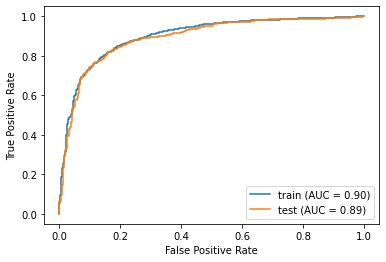

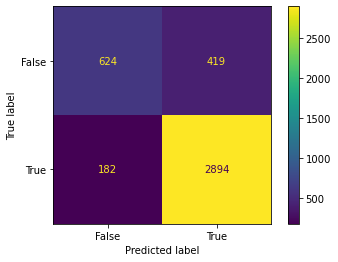

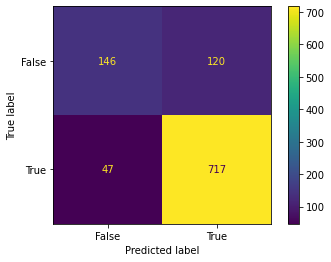

In [10]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

Number of Neighbors: 5
Metric: manhattan
Weights: distance
Mean Cross-Val Score: 0.8302985171465984
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8126213592233009
Recall Score: 0.9515706806282722
Precision Score: 0.8233295583238958
F1 score: 0.8828172434729811


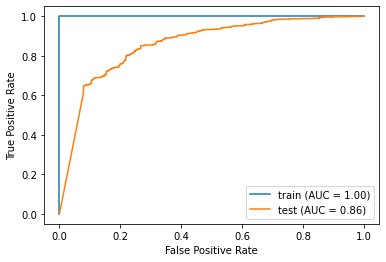

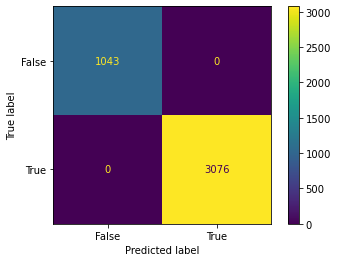

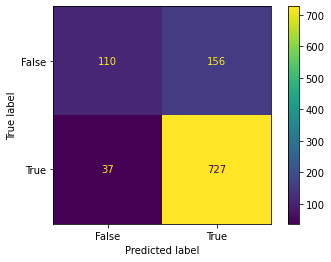

In [11]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [12]:
dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [13]:
X_train_best_dtree=X_train[dtree_feats]
X_test_best_dtree=X_test[dtree_feats]

Max Depth: 15
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.7742137455909589
Train Mean Accuracy: 0.9987861131342559
Test Mean Accuracy: 0.7864077669902912
Recall Score: 0.862565445026178
Precision Score: 0.851421188630491
F1 score: 0.8569570871261378


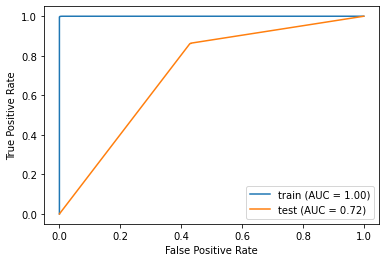

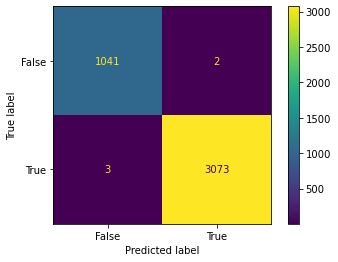

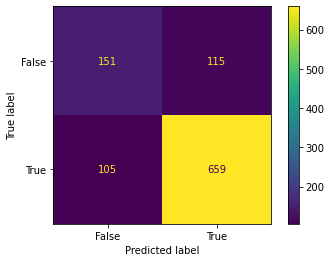

In [14]:
dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [15]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

Number of Trees: 110
Criterion: entropy
Mean Cross-Val Score: 0.8421934905448927
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8466019417475729
Recall Score: 0.975130890052356
Precision Score: 0.8427601809954751
F1 score: 0.904126213592233


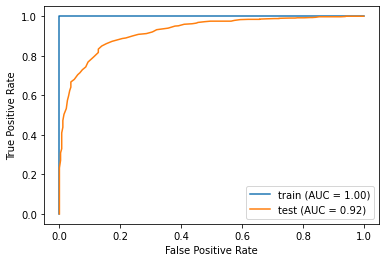

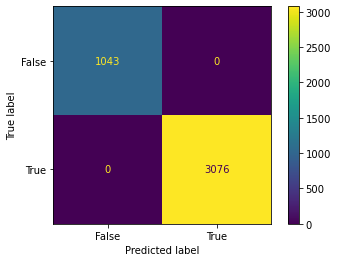

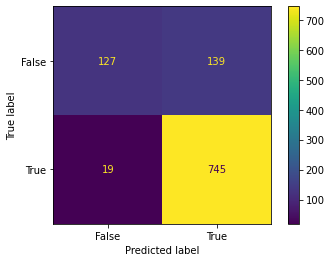

In [16]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

In [18]:
#bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

XGBoost Learning Rate: 0.1
XGBoost Max Depth: 4
XGBoost Min Child Weight: 3
XGBoost Subsample: 1
XGBoost Estimators: 500
Mean Cross-Val Score: 0.8608916585072374
Train Mean Accuracy Score: 1.0
Test Mean Accuracy Score: 0.8679611650485437
Recall Score: 0.9607329842931938
Precision Score: 0.8738095238095238
F1 score: 0.9152119700748129


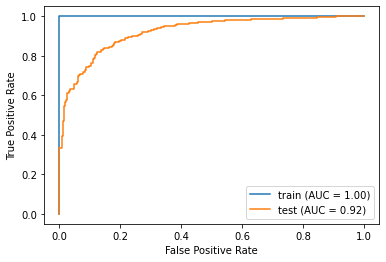

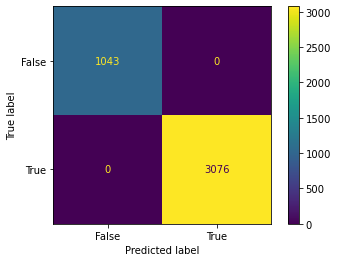

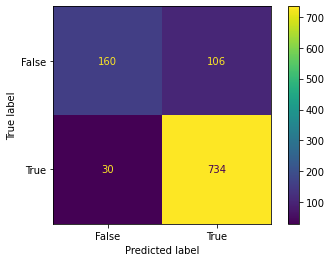

In [19]:
xgboost(X_train, X_test, y_train, y_test, cv=5)